# Custom Functions

This notebook contains the documentation of custom functions we defined while building models. 

Here are the steps to import those functions:

```python
!pip install requests
```

```python
import requests
```

```python
url = 'https://raw.githubusercontent.com/danieldovale/DMML2022_Tissot/main/code/custom_functions.py'
r = requests.get(url)


with open('custom_functions.py', 'w') as f:
    f.write(r.text)
print(r.text)

import custom_functions as cfun
```
In order to call those functions, use prefix cfun.
> For example: 
```python 
cfun.evaluate(y_test, y_pred)
```


---

# 1. evaluate()

In [ ]:
def evaluate(true, pred):
    precision = precision_score(true, pred, average = 'weighted')
    recall = recall_score(true, pred, average = 'weighted')
    f1 = f1_score(true, pred, average = 'weighted')
    acc = accuracy_score(true, pred)
    index = 'result'
    d = {'accuracy': round(acc,4), 'precision': round(precision,4), 'recall': round(recall,4), 'f1 score': round(f1,4) }
    df = pd.DataFrame(d,index=["results"])
    sns.heatmap(pd.DataFrame(confusion_matrix(true, pred)), annot=True, cmap='Oranges', fmt='.7g');
    return df

The function `evaluate` takes in two arguments: `true` and `pred`. These are both lists or arrays of the same length, containing the true labels and predicted labels respectively for a classification task.

The function then calculates the following evaluation metrics:

* `precision`: the ratio of true positive predictions to all positive predictions    
* `recall`: the ratio of true positive predictions to all actual positive instances              
* `F1 score`: the harmonic mean of precision and recall                       
* `accuracy`: the ratio of correct predictions to the total number of predictions           

The function also generates a confusion matrix using the confusion_matrix function, which visualizes the number of true positive, true negative, false positive, and false negative predictions. Then the function plots a confusion matrix using the sns.heatmap function.

The evaluation metrics are then stored in a dictionary and used to create a Pandas dataframe, which is returned by the function.







**Example return:**

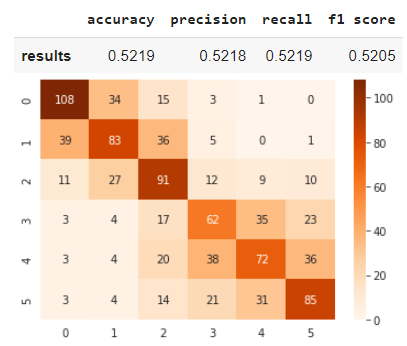



---

## 2. prediction()

In [ ]:
def prediction(data, name, download = False):
    df = pd.DataFrame(data = data)
    df.index.names = ['id']
    df.rename(columns = {0:'difficulty'}, inplace = True)
    file_name = name + ".csv"
    df.to_csv(file_name)
    if download == True:
      files.download(file_name)
    return df.head()

The prediction function takes in three arguments:

* `data`: a list or array of data
* `name`: a string representing the name to be used for the resulting CSV file
* `download`: a boolean indicating whether or not to download the CSV file (defaults to False)
The function first creates a Pandas dataframe from the input data, using the first element of each item in the data list as the index and the second element as the value in the 'difficulty' column. It then renames the index to 'id' and renames the '0' column to 'difficulty'.

The function then saves the dataframe to a CSV file with the specified name. If the download argument is set to True, the function uses the files.download function from the Google Colab library to download the file. Finally, the function returns the first few rows of the dataframe.

---

# 3. class_accuracy() 

In [ ]:
def class_accuracy(y_test, y_pred):
  unique, counts = np.unique(y_test, return_counts=True)
  target = dict(zip(unique, counts))
  diagonal = confusion_matrix(y_test, y_pred).diagonal()
  percentages = diagonal / np.array(list(target.values()))
  for index, key in enumerate(target.keys()):
    print(f'{key}: {percentages[index]:.2f}%')

This function calculates accuracy for each classes. It takes in two input arguments:

1. `y_test`: array of true labels for the test data
2. `y_pred`: array of predicted labels for the test data

The function first uses np.unique to find the unique labels in the y_test array, as well as their counts. It stores these values in the variables unique and counts, respectively.

Next, the function creates a dictionary, target, that maps each unique label to its count. It does this using the zip function to combine the two arrays unique and counts into a single iterable.

Then, the function calculates the diagonal of the confusion matrix for the test data using the confusion_matrix function from scikit-learn. The diagonal of a confusion matrix represents the number of instances that were correctly classified for each class.

The function then divides the values in the diagonal by the corresponding class counts in the target dictionary to compute the class accuracy percentages.

Finally, the function iterates over the keys in the target dictionary and prints out the class accuracy percentage for each class.

**Example return:**

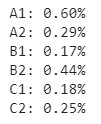

---

# 4. pred_compare_df() and compare()

In [ ]:
def pred_compare_df(X_test, y_test, y_pred):
    tempdf_1 = pd.concat([X_test, y_test], axis = 1).reset_index(drop=True)
    y_pred_df = pd.Series(y_pred)
    tempdf_2 = pd.concat([tempdf_1, y_pred_df], axis =1).rename(columns = {0: 'predicted difficulty'}) 
    tempdf_3 = pd.Series(tempdf_2['difficulty'] == tempdf_2['predicted difficulty'])
    final_df = pd.concat([tempdf_2, tempdf_3], axis = 1).rename(columns = {0: 'correct prediction'}) 
    return final_df

This function compares the true labels and predicted labels for a classification task and returns a data frame that contains the test data and the true and predicted labels. It takes in three input arguments:

1. `X_test`: a data frame containing the feature values for the test data
2. `y_test`: one dimensional dataframe containing the true labels for the test data
3. `y_pred`: one dimensional dataframe containing the predicted labels for the test data

The function starts by concatenating the `X_test` and `y_test` data frames along the columns axis. It then resets the index of the resulting data frame using the `reset_index` function and drops the old index. This results in a new data frame, `tempdf_1`, that contains the test data and the true labels.

Next, it concatenates `y_pred` with tempdf_1 along the columns axis to create a new data frame, `tempdf_2`, that contains the test data, the true labels, and the predicted labels. The function then renames the third column in tempdf_2 to 'predicted difficulty'.

The function then creates a new series, `tempdf_3`, that contains a boolean value for each row in `tempdf_2`, indicating whether the true label and predicted label for that row are equal. It does by comparing the 'difficulty' and 'predicted difficulty' columns in `tempdf_2`.

Finally, the function concatenates `tempdf_2` and `tempdf_3` to create the final data frame, `final_df`, and renames the third column to 'correct prediction'. The function then returns final_df.

**Example return:**

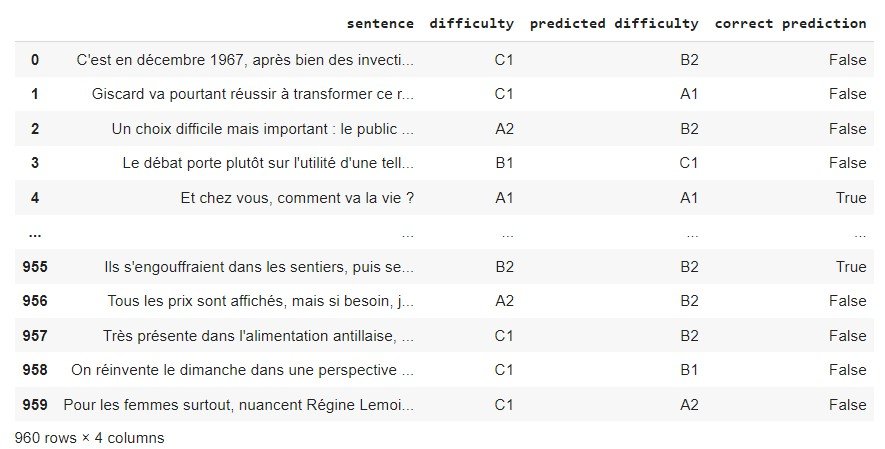

In [ ]:
def compare(df, i):
  temp = df.iloc[i]
  print("sentence:\t\t%s\ndifficulty:\t\t%s\npredicted difficulty:\t%s\ncorrect prediction:\t%s" % (temp["sentence"], 
  temp["difficulty"], 
  temp["predicted difficulty"], 
  temp['correct prediction']))

This function takes in a data frame and an integer index, and prints out a comparison of the true label and predicted label for the row at the specified index in the data frame. It is intended to be used in conjunction with the `pred_compare_df` function.

The function first uses the iloc attribute to select the row at the specified index in the data frame. It then stores this row in a new variable, temp.

Next, the function uses a formatted string to print out the sentence, true label, predicted label, and a boolean value indicating whether the prediction was correct. It does this by using the `%` operator to insert the values of the corresponding columns in the temp data frame into the string.

The `\t` characters in the string are escape sequences that add tab characters to the output, which helps to align the columns of the output.

**Example return:**

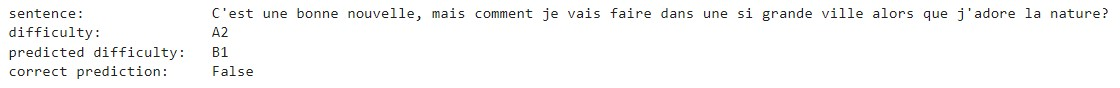

---

# 5. get_info()

In [ ]:
def get_info(df):
  
    text_length = []                          
    number_of_sentences = []
    number_of_words = []
    sent_length_avg = []
    words_length_avg = []
    number_of_words_after_lemma_stop = []
    longest_word_size = []
    
    for text in tqdm(df['sentence'].values):
        
      initial_length = len(text)
      text_length.append(initial_length)

      num_sentences = len(sent_tokenize(text))
      number_of_sentences.append(num_sentences)
        
      punctuations = string.punctuation
      text2 = text.lower()
      text2 = word_tokenize(text2)
      text2 = [word for word in text2 if word not in punctuations]
      num_words = len(text2)
      number_of_words.append(num_words)

      sent_length_avg.append(num_words/num_sentences)
        
      words_length_avg.append(initial_length/num_words)

      text = sp(text)
      text = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in text]
      text = [word for word in text if not word in spacy.lang.fr.stop_words.STOP_WORDS and word not in punctuations]

      num_words_after_lemma_stop = len(text)
      number_of_words_after_lemma_stop.append(num_words_after_lemma_stop)

      word_len = [len(w) for w in text2]
      longest_word_size.append(np.max(word_len))
        
    final_df = pd.concat([pd.Series(text_length), pd.Series(number_of_sentences),
                             pd.Series(number_of_words), pd.Series(sent_length_avg),
                             pd.Series(words_length_avg), pd.Series(number_of_words_after_lemma_stop),
                             pd.Series(longest_word_size)], axis = 1)
    final_df.columns = ["text_length", "number_of_sentences", "number_of_words",
                           "sent_length_avg", "words_length_avg",
                           "number_of_words_after_lemma_stop", "longest_word_size"]
    
    return final_df

The `get_info` function takes in a single argument: a Pandas dataframe `df` with a column called 'sentence'.

The function initializes several empty lists to store various statistics about the sentences in the dataframe. It then iterates through the 'sentence' column of the dataframe using a progress bar provided by the `tqdm` function.

For each sentence in the dataframe, the function performs the following operations:

1. It calculates the length (in characters) of the text and appends it to the `text_length` list.

2. It uses the `sent_tokenize` function from the `nltk` library to split the text into individual sentences, and then counts the number of sentences. This value is appended to the `number_of_sentences` list.

3. It tokenizes the text into words using the `word_tokenize` function from the `nltk` library, removes punctuation, and counts the number of words. This value is appended to the number_of_words list.

4. It calculates the average number of words per sentence by dividing the `number_of_words` by the `number_of_sentences` and appends the result to the `sent_length_avg` list.

5. It calculates the average length of the words in the text by dividing the `text_length` by the `number_of_words` and appends the result to the `words_length_avg` list.

6. It processes the text using the `spacy` library to lemmatize the words and remove stop words. It then counts the number of remaining words and appends the result to the `number_of_words_after_lemma_stop` list.

7. It calculates the length of each word in the sentence, finds the longest word, and appends its length to the `longest_word_size` list.

After iterating through all the sentences in the dataframe, the function creates a new dataframe from the statistics lists and assigns appropriate column names. Finally, it returns the resulting dataframe.

**Example return:** 

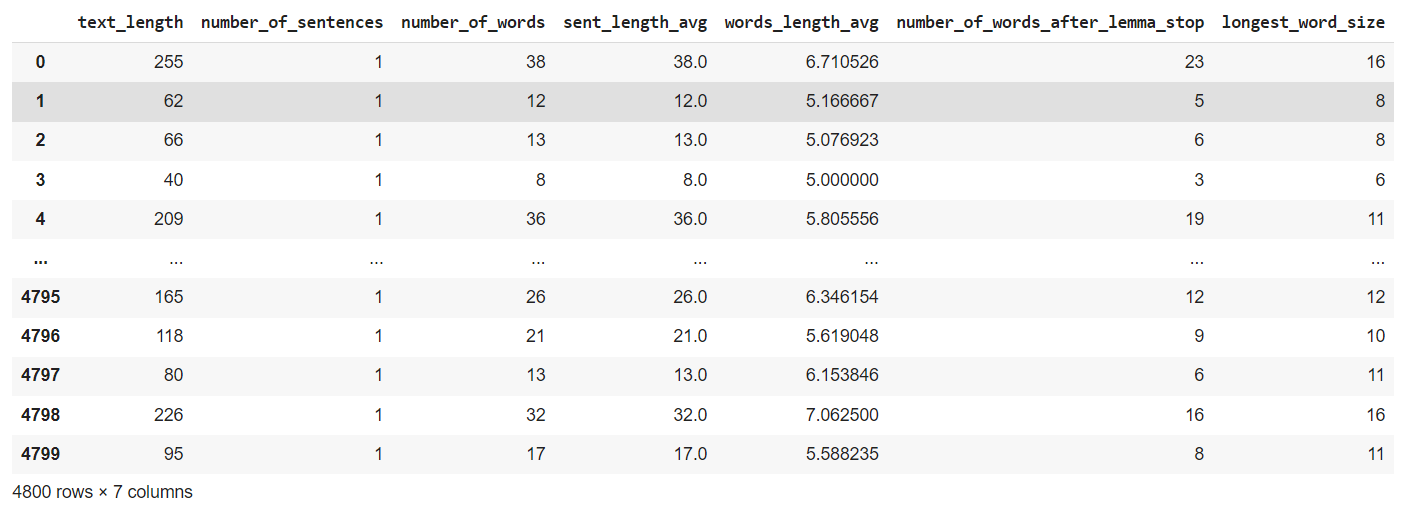